# WORK IN PROGRESS
## Studio dell'importanza delle feature tramite il random forest regressor
### da vedere dopo

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# %pip install -U scikit-learn


In [20]:
df_labeled = pd.read_parquet('../../data/processed/ds_labeled.parquet')

In [21]:
df_app = df_labeled.copy()
df_app = df_app.drop(['id_prenotazione', 'id_paziente', 'data_nascita', 'data_contatto', 'data_erogazione', 'id_professionista_sanitario'], axis=1)

In [22]:
df_app['durata_erogazione_sec'] =  df_app.durata_erogazione_sec.astype(int)

In [23]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460509 entries, 0 to 484290
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   sesso                               460509 non-null  object
 1   regione_residenza                   460509 non-null  object
 2   tipologia_servizio                  460509 non-null  object
 3   descrizione_attivita                460509 non-null  object
 4   tipologia_struttura_erogazione      460509 non-null  object
 5   tipologia_professionista_sanitario  460509 non-null  object
 6   durata_erogazione_sec               460509 non-null  int64 
 7   eta                                 460509 non-null  int64 
 8   anno                                460509 non-null  int32 
 9   quadrimestre                        460509 non-null  int32 
 10  incremento_teleassistenze           460509 non-null  object
dtypes: int32(2), int64(2), object(7)
memory usag

In [24]:
# Seleziona le colonne categoriche
categorical_cols = ['sesso', 'regione_residenza', 'tipologia_servizio', 'descrizione_attivita', 'tipologia_struttura_erogazione', 'tipologia_professionista_sanitario']

# One-Hot Encoding
encoder = OneHotEncoder(drop='first')
encoded_categorical_cols = encoder.fit_transform(df_app[categorical_cols])

In [25]:
# Converti in DataFrame
encoded_df = pd.DataFrame(encoded_categorical_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

In [26]:
encoded_df.shape

(460509, 109)

In [27]:
df_app[['durata_erogazione_sec', 'eta', 'anno', 'quadrimestre']].shape

(460509, 4)

: 

In [28]:
# Unisci con le colonne numeriche
# Con reset_index ignoriamo gli indici originali e usiamo nuovi indici sequenziali
X = pd.concat([encoded_df.reset_index(drop=True), df_app[['durata_erogazione_sec', 'eta', 'anno', 'quadrimestre']].reset_index(drop=True)], axis=1)

In [ ]:
y = df_app['incremento_teleassistenze']

In [ ]:
X.shape

(460509, 113)

In [ ]:
y.shape

(460509,)

In [ ]:
# Inizializza e addestra il modello di classificazione
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Ottieni l'importanza delle feature
feature_importance = model.feature_importances_

# Creazione di un DataFrame per visualizzare i risultati
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_importanti = importance_df.sort_values(by=['Importance'])
feature_importanti

,Feature,Importance
31,descrizione_attivita_Educazione alla cura del ...,0.000122
54,descrizione_attivita_Intervento di educazione ...,0.000125
103,tipologia_professionista_sanitario_Ostetrica/o,0.000131
108,tipologia_professionista_sanitario_Terapista d...,0.000133
107,tipologia_professionista_sanitario_Terapista O...,0.000138
...,...,...
20,regione_residenza_Veneto,0.023747
16,regione_residenza_Sicilia,0.023860
3,regione_residenza_Campania,0.028327
8,regione_residenza_Lombardia,0.034378


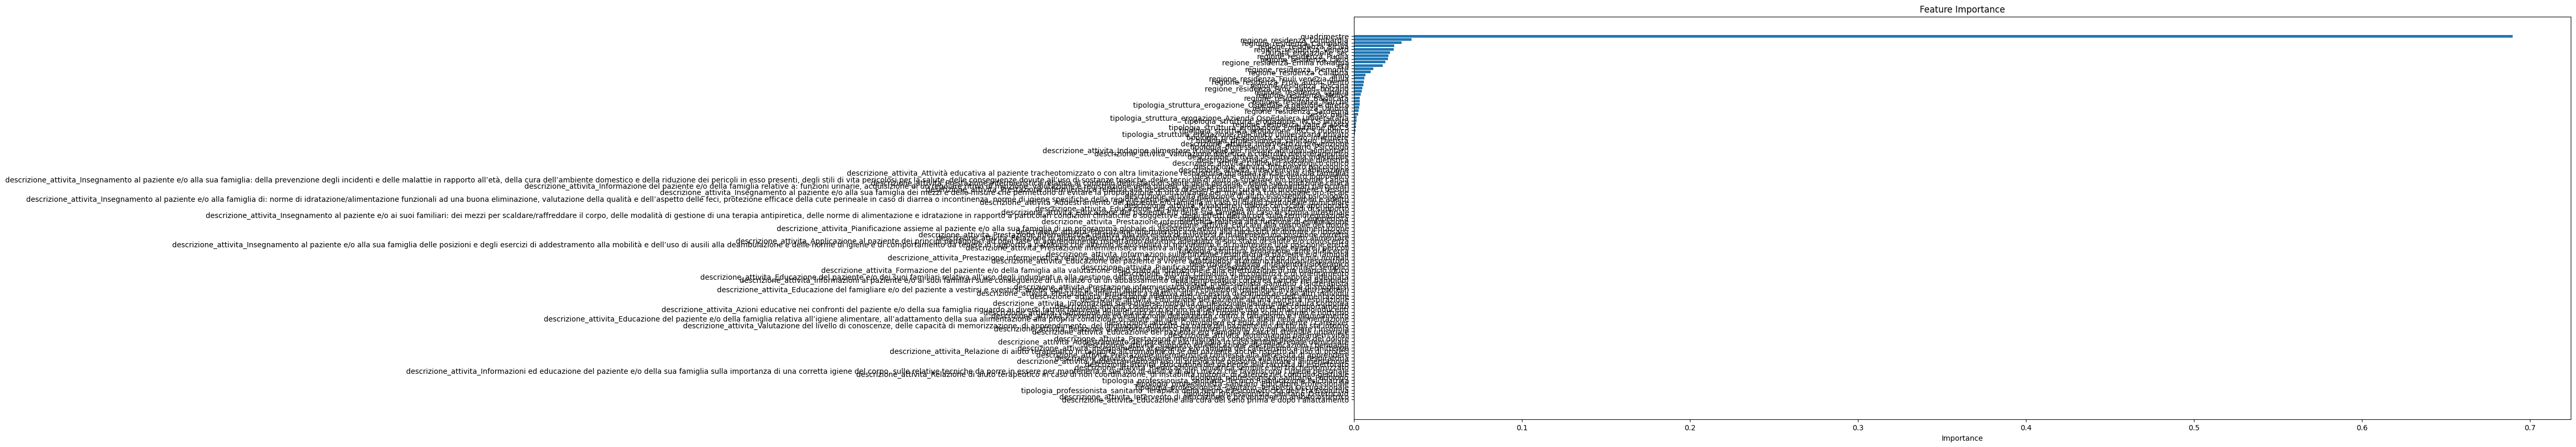

In [ ]:
# Visualizzazione con un grafico a barre
plt.figure(figsize=(30, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverte l'asse y per avere la feature più importante in cima
plt.show()